# 🧭 Amazon Product Data Exploratory Data Analysis (EDA)

This study includes data cleaning, summarization, and visualization steps on product data obtained from Amazon.
Objective: To derive meaningful insights from product price, discount, rating, and review information.

| Column Name           | Description                                                                                                       |
| --------------------- | ----------------------------------------------------------------------------------------------------------------- |
| `product_id`          | Unique identification number for each product (ID assigned by Amazon).                                            |
| `product_name`        | Full name or title of the product (brand + model + short description).                                            |
| `category`            | Category hierarchy the product belongs to (example: *Computers & Accessories → Cables & Adapters → Lightning Cables*). |
| `discounted_price`    | Discounted selling price of the product (with ₹ symbol).                                                          |
| `actual_price`        | Non-discounted (original) price of the product.                                                                   |
| `discount_percentage` | Discount percentage (example: `64%`).                                                                             |
| `rating`              | Average rating given by Amazon users (between 1–5).                                                               |
| `rating_count`        | Total number of ratings given to the product (number of users).                                                   |
| `about_product`       | Short summary of product description or technical specifications.                                                 |
| `user_id`             | Unique Amazon user IDs of users who reviewed the product (multiple, comma-separated).                             |
| `user_name`           | Names of users who reviewed (comma-separated).                                                                    |
| `review_id`           | Unique identification numbers for each user review (comma-separated).                                             |
| `review_title`        | Titles of user reviews (example: “Great Cable”, “Not Durable”).                                                   |
| `review_content`      | Full text content of user reviews.                                                                                |
| `img_link`            | Link (URL) to the product image on Amazon.                                                                        |
| `product_link`        | Link to the product page on Amazon (product detail page URL).                                                     |


## 📦 1. Loading Libraries and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("amazon.csv")
df.head(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹149,"₹1,000",85%,3.9,"24,871",Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,₹176.63,₹499,65%,4.1,"15,188",It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_4

## 🧹 2. Data Cleaning

### 🔍 2.1 General Data Inspection
- Are data types correct?
- Are there missing values (NaN)?
- Is the same product repeated in multiple rows?

#### Check the data types

In [6]:
df.shape

(1465, 16)

In [8]:
df.describe().T

,count,unique,top,freq
product_id,1465,1351,B07JW9H4J1,3
product_name,1465,1337,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
category,1465,211,Computers&Accessories|Accessories&Peripherals|...,233
discounted_price,1465,550,₹199,53
actual_price,1465,449,₹999,120
discount_percentage,1465,92,50%,56
rating,1465,28,4.1,244
rating_count,1463,1143,"9,378",9
about_product,1465,1293,[CHARGE & SYNC FUNCTION]- This cable comes wit...,6
user_id,1465,1194,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...",10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [5]:
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [15]:
product_counts = df['product_id'].value_counts()

# Number of products that appear more than once
repeated_products = product_counts[product_counts > 1]

# Results
print("Number of repeated products:", repeated_products.shape[0])
repeated_products.head()

Number of repeated products: 92


product_id
B07JW9H4J1    3
B085DTN6R2    3
B07XLCFSSN    3
B077Z65HSD    3
B09W5XR9RT    3
Name: count, dtype: int64

### 🧼 2.2 Transforming Price Columns
> 💡 Let's remove “₹” symbols and “%” signs and convert them to numerical values.

In [16]:
df_copy = df.copy()

In [17]:
df_copy['discounted_price'] = (
    df_copy['discounted_price']
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

df_copy['actual_price'] = (
    df_copy['actual_price']
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

df_copy['discount_percentage'] = (
    df_copy['discount_percentage']
    .str.replace('%', '', regex=False)
    .astype(float)
)

df_copy['rating'] = pd.to_numeric(df_copy['rating'], errors='coerce')

df_copy['rating_count'] = (
    df_copy['rating_count']
    .str.replace(',', '', regex=False)
)

df_copy['rating_count'] = pd.to_numeric(df_copy['rating_count'], errors='coerce')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [73]:
df_copy.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,price_range,main_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,0-500,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,0-500,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,0-500,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,0-500,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,0-500,Computers&Accessories


### 🧮 2.3 Transforming Rating Columns
> 💡 `rating` and `rating_count` should be converted to numerical structures.

In [20]:
df_copy['rating'] = pd.to_numeric(df_copy['rating'], errors='coerce')

df_copy['rating_count'] = (
    df_copy['rating_count']
    .astype(str)
    .str.replace(',', '', regex=False)
)

df_copy['rating_count'] = pd.to_numeric(df_copy['rating_count'], errors='coerce')

In [21]:
df_copy.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### 🔁 2.4 Checking for Duplicate Records

In [22]:
duplicate_rows = df_copy.duplicated()
duplicate_count = duplicate_rows.sum()

print("Number of duplicate records:", duplicate_count)

df_copy[duplicate_rows].head()

Number of duplicate records: 0


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


### 🧾 2.5 Basic Statistical Properties

In [24]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
discounted_price,1465.0,3125.310874,6944.304394,39.0,325.0,799.0,1999.0,77990.0
actual_price,1465.0,5444.990635,10874.826864,39.0,800.0,1650.0,4295.0,139900.0
discount_percentage,1465.0,47.691468,21.635905,0.0,32.0,50.0,63.0,94.0
rating,1464.0,4.096585,0.291674,2.0,4.0,4.1,4.3,5.0
rating_count,1463.0,18295.541353,42753.864952,2.0,1186.0,5179.0,17336.5,426973.0


## 🔎 3. Exploratory Questions and Visualizations

### ❓ Q1: Which products have the highest discounts?
> In which product categories do high discounts stand out?

📊 Visualization Suggestion:
- Bar chart: Top 10 products with the highest discount rates
- Boxplot: Discount percentages by category

In [26]:
top_discount_products = (
    df_copy[['product_name', 'category', 'discount_percentage']]
    .dropna()
    .sort_values(by='discount_percentage', ascending=False)
    .head(10)
)
top_discount_products

,product_name,category,discount_percentage
695,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",Computers&Accessories|Accessories&Peripherals|...,94.0
368,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,91.0
380,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,91.0
334,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,91.0
372,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,91.0
364,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,91.0
1026,beatXP Kitchen Scale Multipurpose Portable Ele...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,90.0
557,LAPSTER 12pcs Spiral Cable Protectors for Char...,Electronics|Mobiles&Accessories|MobileAccessor...,90.0
542,Sounce Protective Case Cover Compatible Boat X...,Electronics|Mobiles&Accessories|MobileAccessor...,90.0
407,Sounce Spiral Charger Cable Protector Data Cab...,Computers&Accessories|Accessories&Peripherals|...,90.0


In [29]:
df_copy['product_name'].nunique()

1337

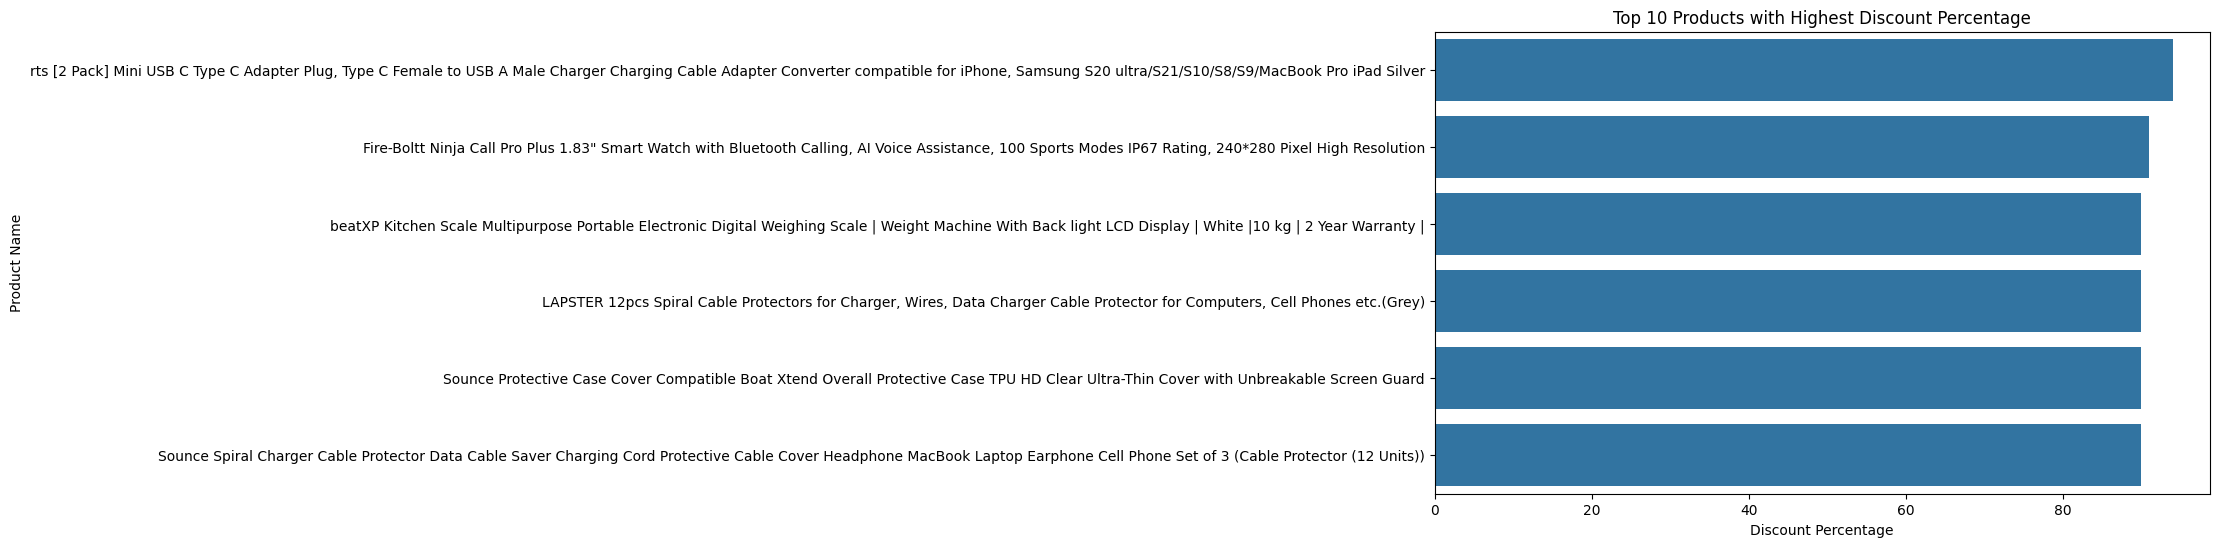

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_discount_products,
    x='discount_percentage',
    y='product_name'
)
plt.title('Top 10 Products with Highest Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Product Name')
plt.yticks(rotation=0)  # keep names horizontal for readability
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

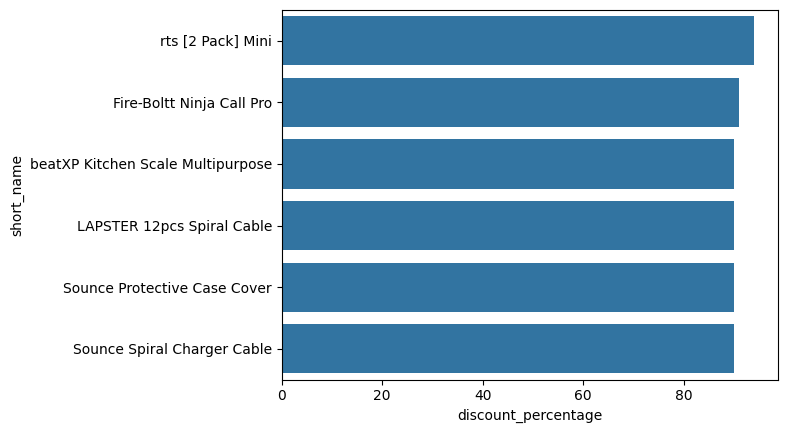

<Figure size 1200x800 with 0 Axes>

In [34]:
top_discount_products['short_name'] = top_discount_products['product_name'].apply(lambda x: ' '.join(x.split()[:4]))
sns.barplot(data=top_discount_products, x='discount_percentage', y='short_name')
plt.figure(figsize=(12,8))



### ❓ Q2: Is there a relationship between price and rating?
> Do expensive products get higher ratings?

📈 Visualization Suggestion:
- Scatter plot: `discounted_price` vs `rating`
- Trend line (regression line)

In [35]:
price_bins = [0, 500, 1000, 2000, 5000, df_copy['discounted_price'].max()]
price_labels = ['0-500', '500-1000', '1000-2000', '2000-5000', '5000+']
df_copy['price_range'] = pd.cut(df_copy['discounted_price'], bins=price_bins, labels=price_labels)

price_rating_group = df_copy.groupby('price_range')['rating'].mean().reset_index()

price_rating_group

,price_range,rating
0,0-500,4.074479
1,500-1000,4.117063
2,1000-2000,4.070545
3,2000-5000,4.089677
4,5000+,4.173301


<Axes: xlabel='discounted_price', ylabel='rating'>

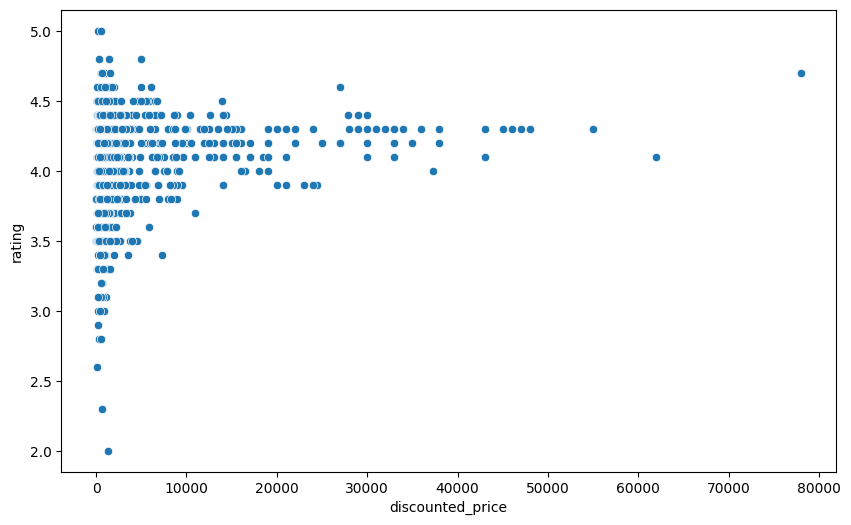

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_copy,
    x='discounted_price',
    y='rating'
)

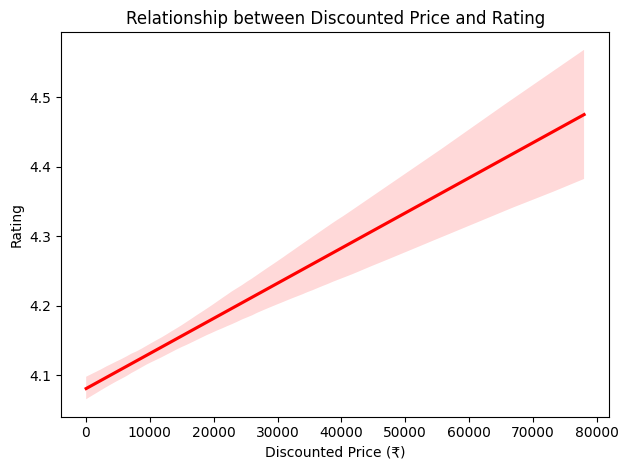

In [39]:
sns.regplot(
    data=df_copy,
    x='discounted_price',
    y='rating',
    scatter=False,
    color='red'
)
plt.title('Relationship between Discounted Price and Rating')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

### ❓ Q3: Which are the most rated products (rating_count)?
> Find the products that attract the most user attention.

📊 Visualization Suggestion:
- Bar chart: Top 10 most rated products
- Wordcloud: Most frequently occurring brand/product name

In [ ]:
top_rated_products = (
    df_copy[['product_name', 'rating_count']]
    .dropna()
    .sort_values(by='rating_count', ascending=False)
    .head(10)
)
top_rated_products

,product_name,rating_count
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,426972.0
400,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
352,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
584,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711.0
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836.0
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836.0
473,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...",313832.0


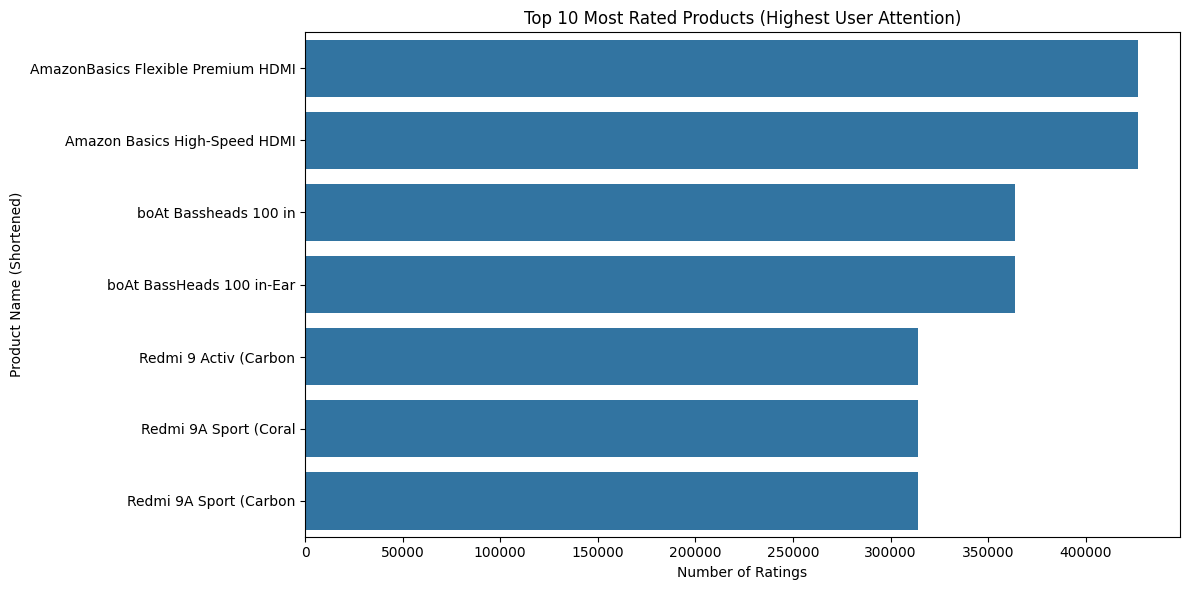

In [54]:
top_rated_products['short_name'] = top_rated_products['product_name'].str.extract(r'^(\S+\s+\S+\s+\S+\s+\S+)')[0]

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_rated_products,
    x='rating_count',
    y='short_name'
)
plt.title('Top 10 Most Rated Products (Highest User Attention)')
plt.xlabel('Number of Ratings')
plt.ylabel('Product Name (Shortened)')
plt.tight_layout()
plt.show()

### ❓ Q4: How do average price and rating vary by category?
> Are products more expensive or do they get higher ratings in some categories?

📊 Visualization Suggestion:
- Groupby + bar chart: Average price & rating per category
- Heatmap: category vs rating or price

In [ ]:
# Create a new column for main category (take first category before '|')
df_copy['main_category'] = df_copy['main_category'].str.replace(r'(?<!^)(?=[A-Z])', '', regex=True)
df_copy['main_category'] = df_copy['main_category'].str.replace(r'\s*&\s*', ' & ', regex=True)


# Check unique main categories
df_copy['main_category'].nunique()
df_copy['main_category'].head()


0    Computers & Accessories
1    Computers & Accessories
2    Computers & Accessories
3    Computers & Accessories
4    Computers & Accessories
Name: main_category, dtype: object

In [90]:
main_cat_stats = df_copy.groupby('main_category').agg({
    'discounted_price': 'mean',
    'rating': 'mean'
}).sort_values(by='discounted_price', ascending=False).reset_index()

<Axes: xlabel='discounted_price', ylabel='main_category'>

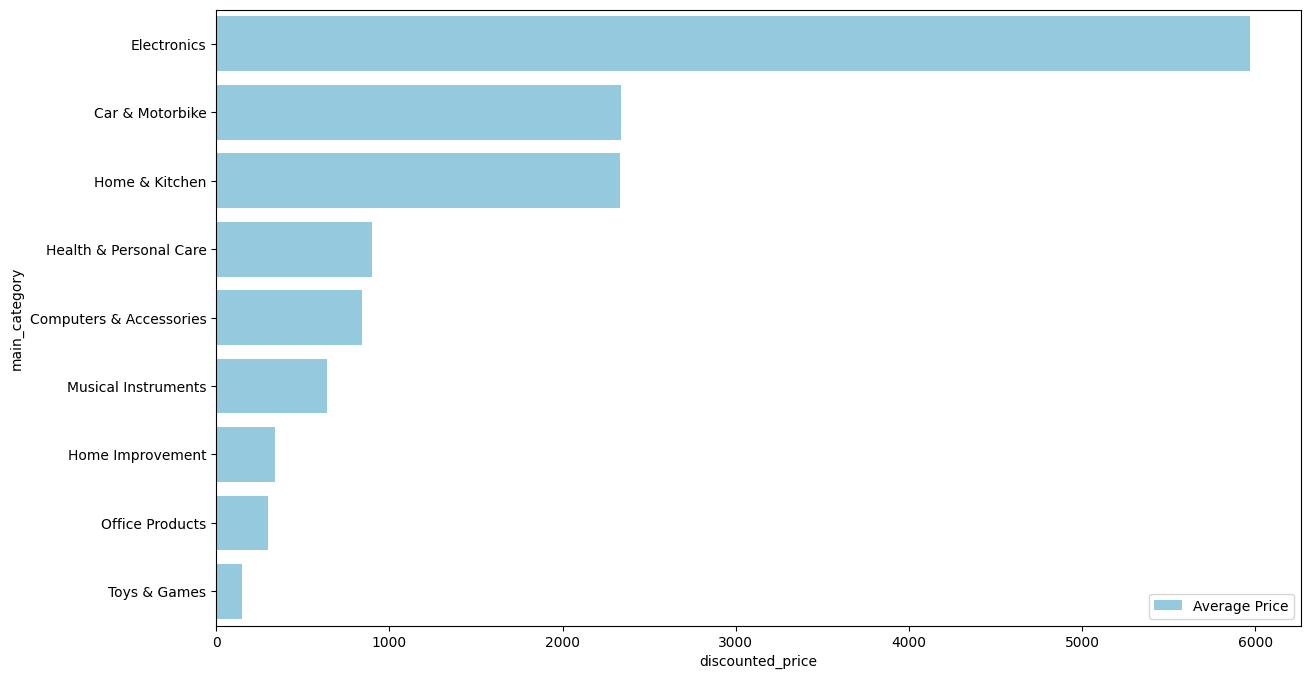

In [91]:
top_main_categories = main_cat_stats.head(15)

# Horizontal bar plot with average price and rating
plt.figure(figsize=(14,8))
sns.barplot(
    data=top_main_categories,
    x='discounted_price',
    y='main_category',
    color='skyblue',
    label='Average Price'
)

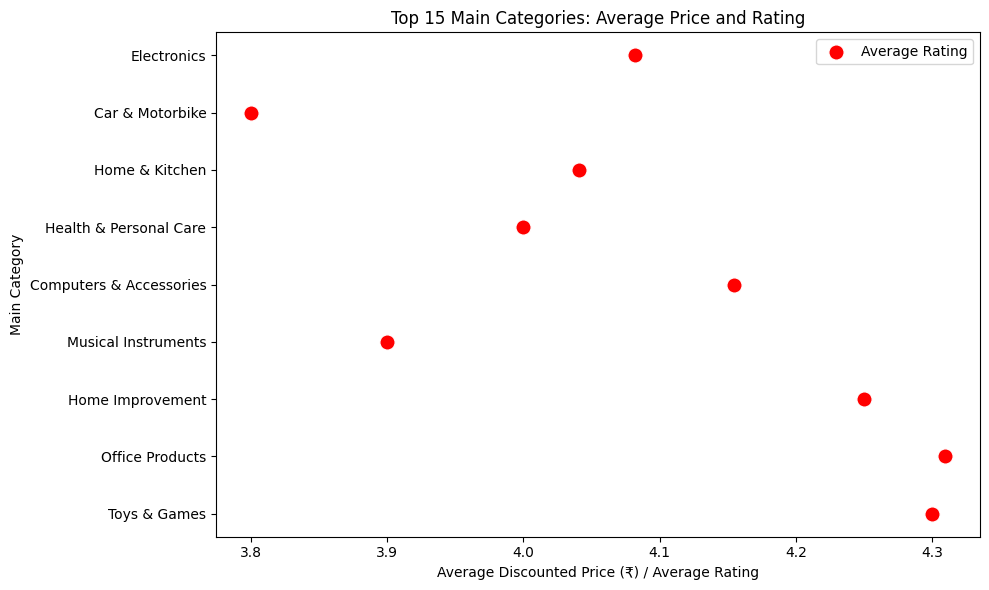

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=top_main_categories,
    x='rating',
    y='main_category',
    color='red',
    s=120,
    label='Average Rating'
)

plt.xlabel('Average Discounted Price (₹) / Average Rating')
plt.ylabel('Main Category')
plt.title('Top 15 Main Categories: Average Price and Rating')
plt.legend()
plt.tight_layout()
plt.show()

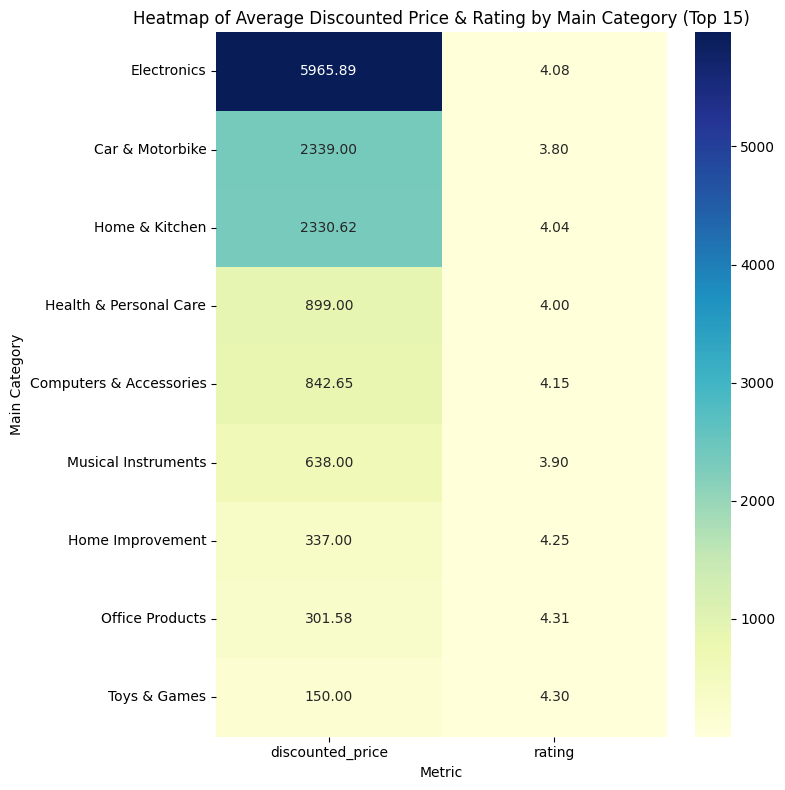

In [104]:
heatmap_data = top_main_categories.set_index('main_category')[['discounted_price', 'rating']]

plt.figure(figsize=(8,8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu"
)
plt.title('Heatmap of Average Discounted Price & Rating by Main Category (Top 15)')
plt.xlabel('Metric')
plt.ylabel('Main Category')
plt.tight_layout()
plt.show()

### ❓ Q5: What do the user review texts say?
> Which words stand out? Like “good”, “durable”, “charging”?

📊 Visualization Suggestion:
- Wordcloud: Based on `review_content`

In [123]:
reviews = df_copy['review_content'].dropna().str.lower()

# Join all reviews into one text
all_text = ' '.join(reviews)

# Remove punctuation and numbers
all_text = re.sub(r'[^a-zA-Z\s]', ' ', all_text)

# Split into words
words = all_text.split()

# Manual stopwords list (common meaningless words)
stopwords = set([
    'the','and','it','to','a','for','in','of','this','i','on','with',
    'my','that','was','but','not','very','is','are','so','as','be','they',
    'have','has','had','you','we','do','does','did','from','at','or','if',
    'its','an','these','there','all','what','when','which','can','will',
    'use', 'one', 'also', 'no', 'only', 'product', 'just', 'using', 'after', 'amazon'
])

# Remove stopwords and single-letter words
words = [w for w in words if w not in stopwords and len(w) > 1]

# Count unigrams (single words)
unigram_counts = Counter(words)

# Count bigrams (two-word phrases)
bigrams = [' '.join([words[i], words[i+1]]) for i in range(len(words)-1)]
bigram_counts = Counter(bigrams)

# Combine unigram + bigram counts
combined_counts = unigram_counts + bigram_counts

# Top 20 most common meaningful words/phrases
top_words = combined_counts.most_common(20)
words_list, counts_list = zip(*top_words)

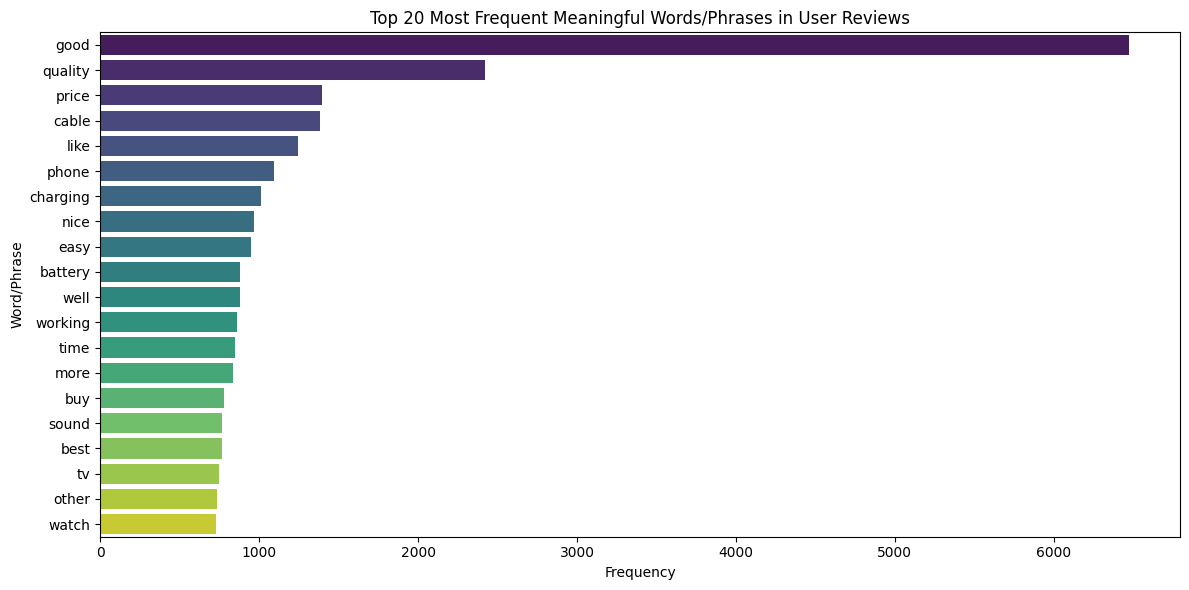

In [124]:
plt.figure(figsize=(12,6))
sns.barplot(x=list(counts_list), y=list(words_list), palette='viridis')
plt.title('Top 20 Most Frequent Meaningful Words/Phrases in User Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word/Phrase')
plt.tight_layout()
plt.show()


## 🧠 5. Conclusion and Insights

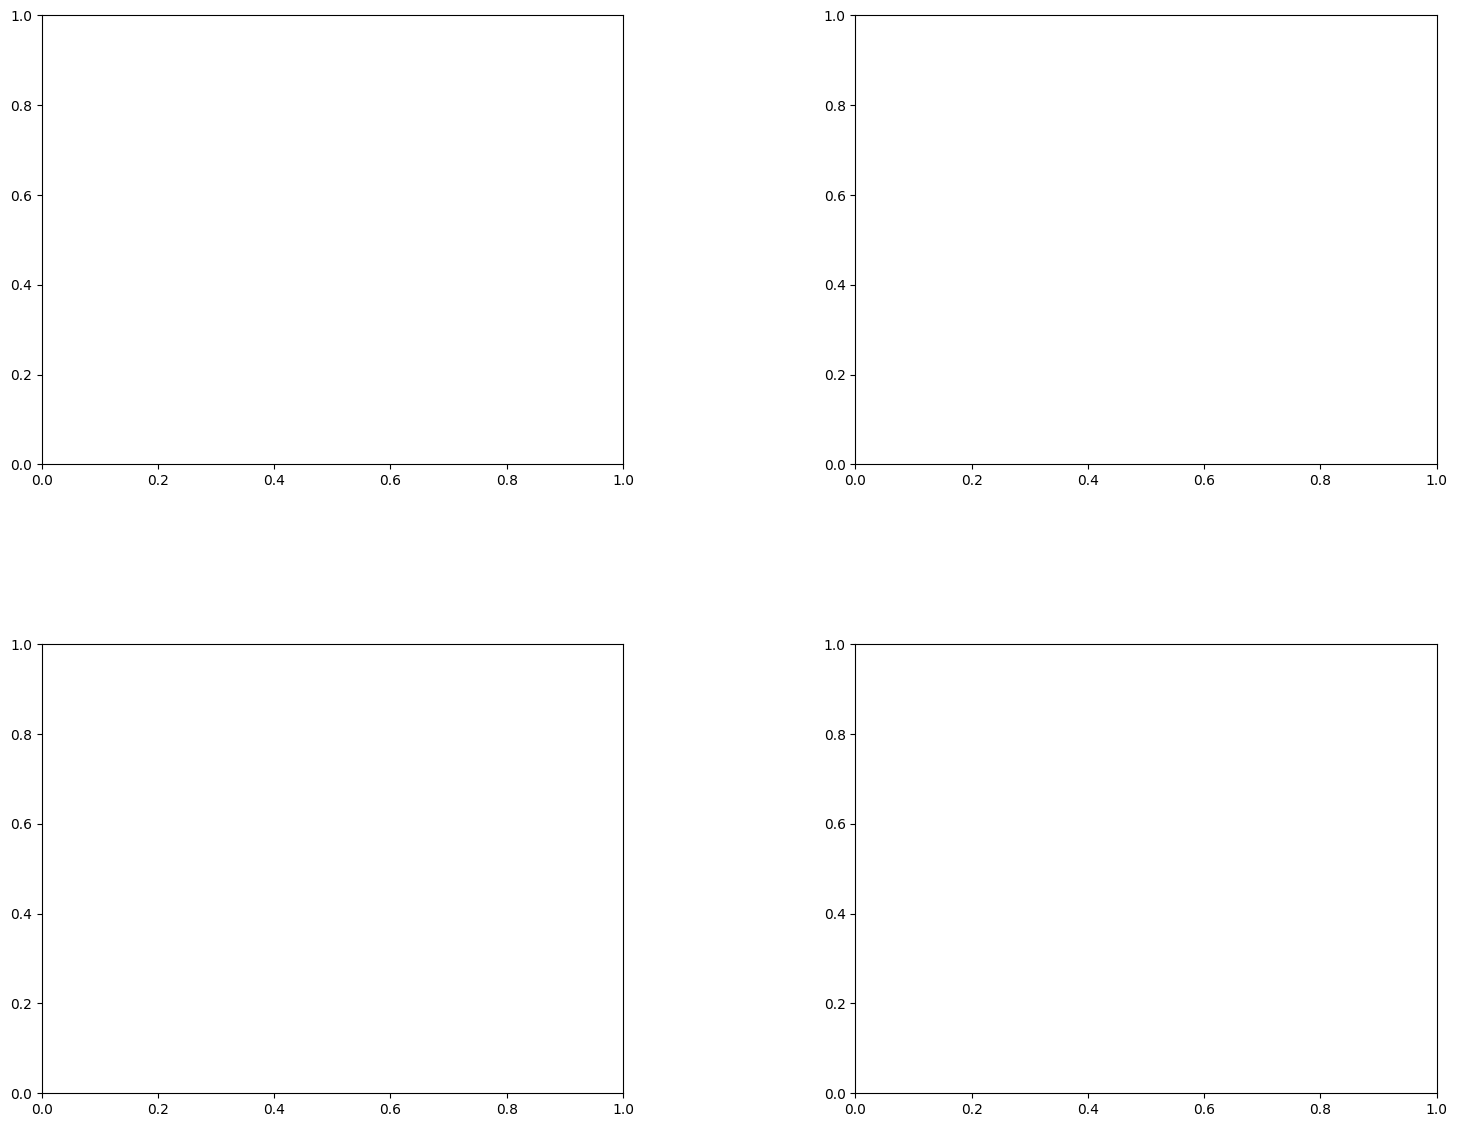

In [130]:
fig, axes = plt.subplots(2, 2, figsize=(18,14))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

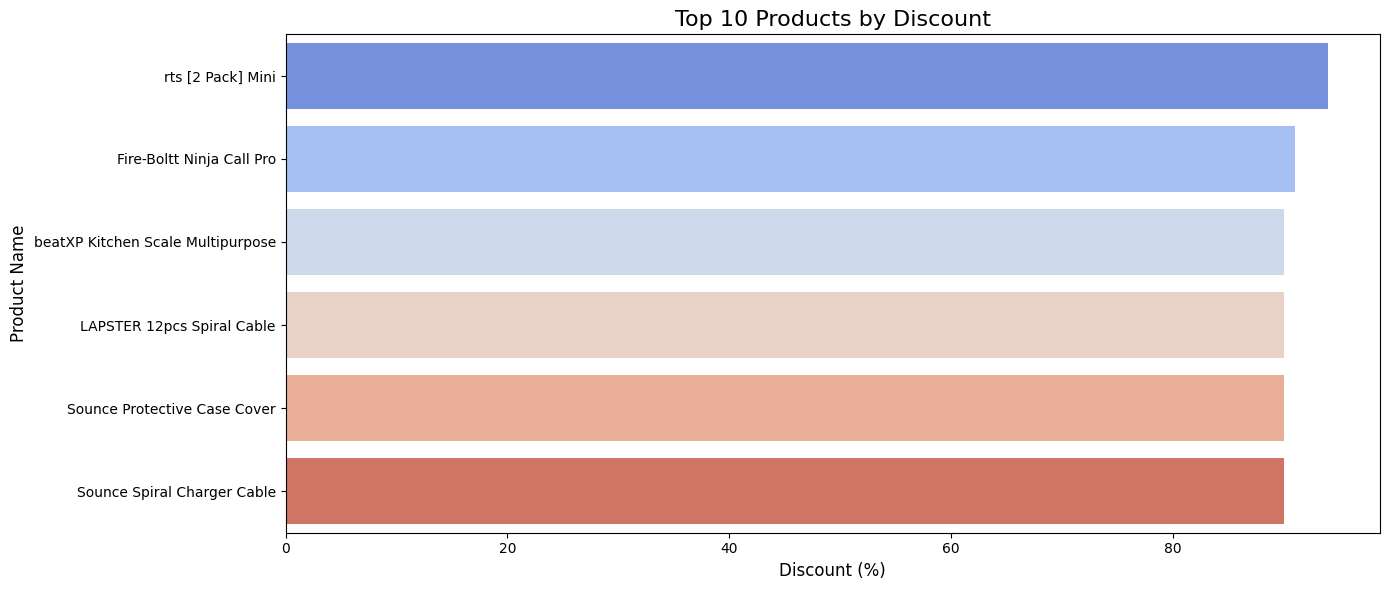

In [135]:
# Top 10 Products by Discount
top_discounted = df_copy.sort_values(by='discount_percentage', ascending=False).head(10)
top_discounted['short_name'] = top_discounted['product_name'].str.split().str[:4].str.join(' ')

plt.figure(figsize=(14,6))
sns.barplot(
    data=top_discounted,
    x='discount_percentage',
    y='short_name',
    palette='coolwarm'
)
plt.title('Top 10 Products by Discount', fontsize=16)
plt.xlabel('Discount (%)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()


#### Top 10 Most Rated Products

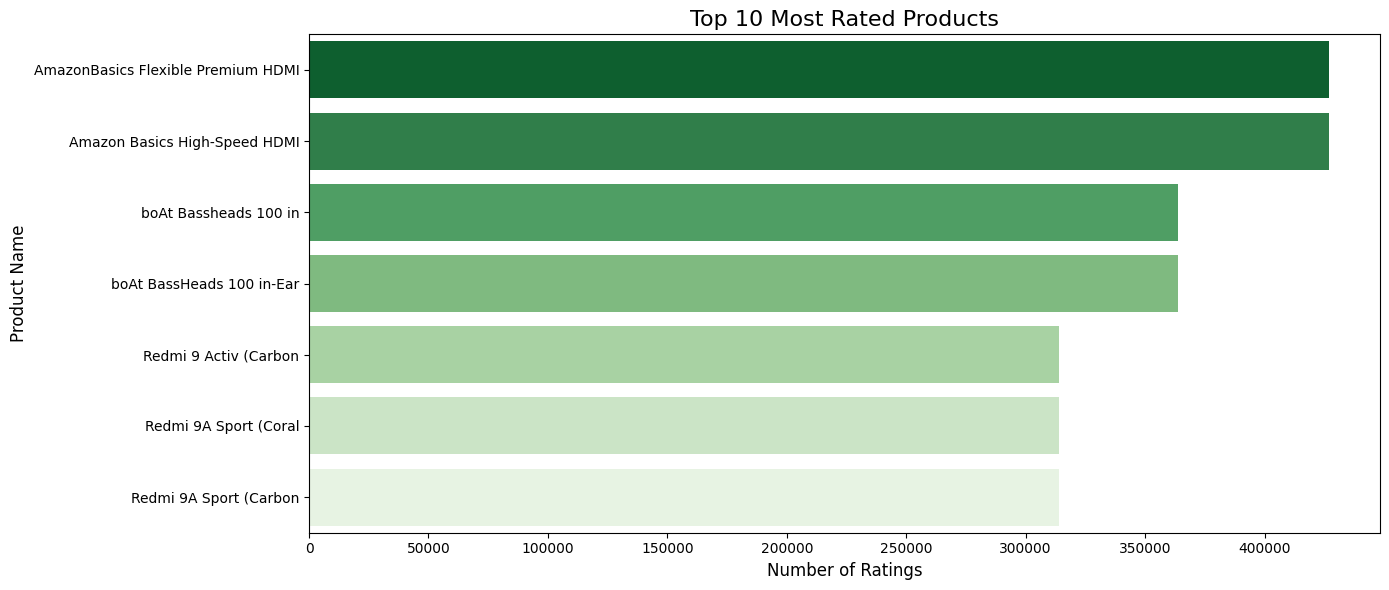

In [ ]:
top_attention_products = (
    df_copy[['product_name', 'rating_count']]
    .dropna()
    .sort_values(by='rating_count', ascending=False)
    .head(10)
)

# Shorten product names for readability
top_attention_products['short_name'] = top_attention_products['product_name'].str.split().str[:4].str.join(' ')

# Now you can plot
plt.figure(figsize=(14,6))
sns.barplot(
    data=top_attention_products,
    x='rating_count',
    y='short_name',
    palette='Greens_r'
)
plt.title('Top 10 Most Rated Products', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()


#### Top 15 Main Categories: Average Price & Rating

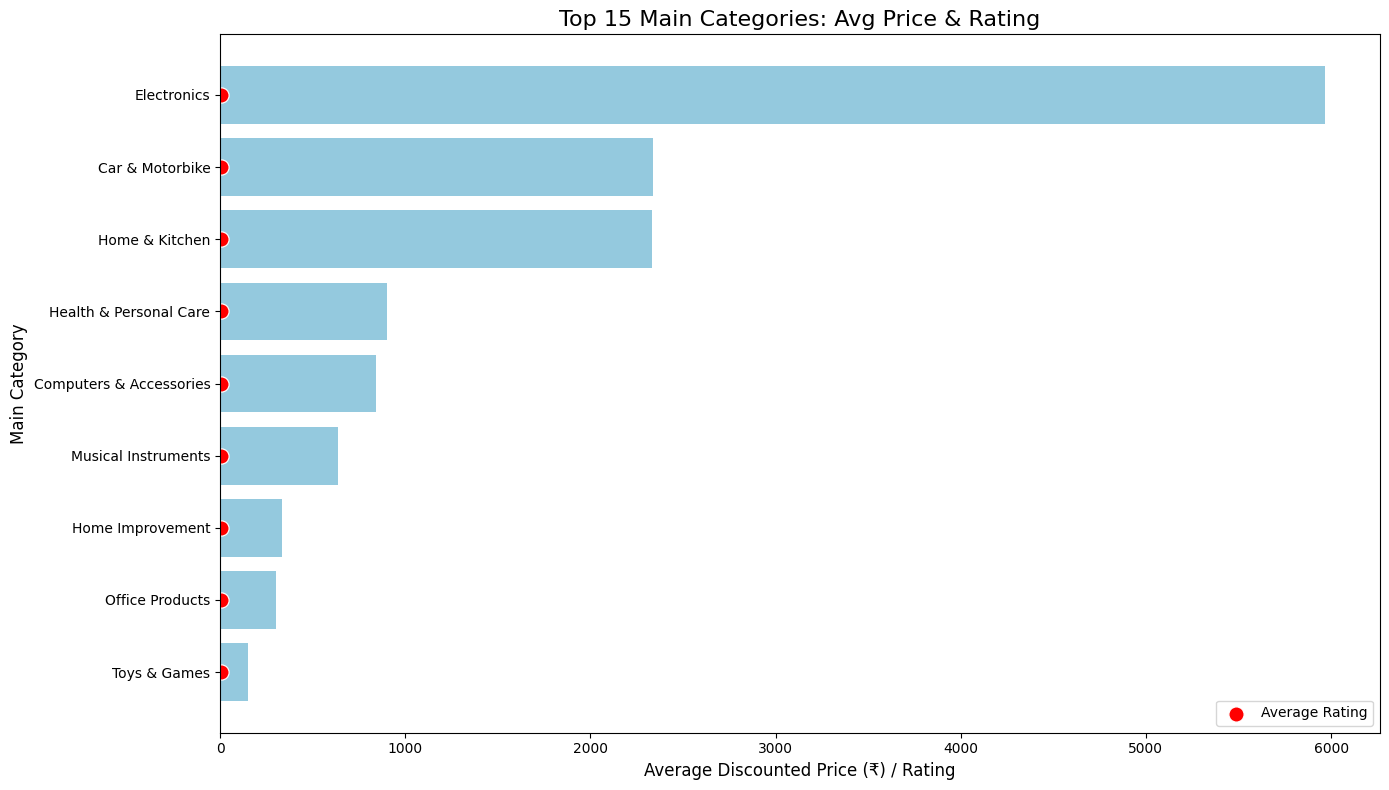

In [137]:
top_main = top_main_categories.copy()

plt.figure(figsize=(14,8))
sns.barplot(
    data=top_main,
    x='discounted_price',
    y='main_category',
    color='skyblue'
)
sns.scatterplot(
    data=top_main,
    x='rating',
    y='main_category',
    color='red',
    s=120,
    label='Average Rating'
)
plt.title('Top 15 Main Categories: Avg Price & Rating', fontsize=16)
plt.xlabel('Average Discounted Price (₹) / Rating', fontsize=12)
plt.ylabel('Main Category', fontsize=12)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
